In [44]:
#!pip install plotly
#!pip install cufflinks

In [45]:
import pandas as pd
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public',theme='ggplot',offline=True)

In [46]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [47]:
df=pd.read_csv('population_total.csv')
# dropping null values
df=df.dropna()
# making a pivot table
df_pivot=df.pivot(index="year", columns="country",values="population")
# selecting some countries
df_pivot=df_pivot[['India','China','Brazil']]
df_pivot

country,India,China,Brazil
year,,,
1955.0,4.098806e+08,6.122416e+08,62533919.0
1960.0,4.505477e+08,6.604081e+08,72179226.0
1965.0,4.991233e+08,7.242190e+08,83373530.0
1970.0,5.551898e+08,8.276014e+08,95113265.0
1975.0,6.231029e+08,9.262409e+08,107216205.0
1980.0,6.989528e+08,1.000089e+09,120694009.0
1985.0,7.843600e+08,1.075589e+09,135274080.0
1990.0,8.732778e+08,1.176884e+09,149003223.0
1995.0,9.639226e+08,1.240921e+09,162019896.0


# 1 Line plot

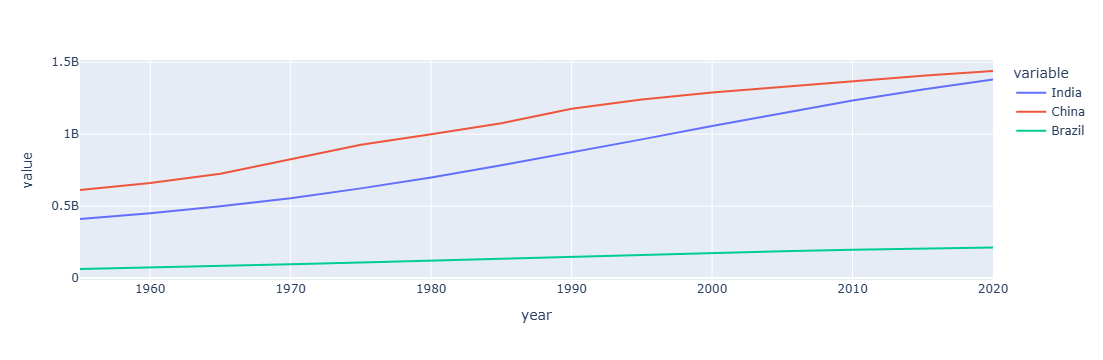

In [51]:
import plotly.express as px

df_plot = df_pivot.reset_index()  # make 'year' a column
fig = px.line(df_plot, x='year', y=df_plot.columns[1:])  # plot all countries
fig.show()



# 2 Barplot

In [52]:
# selecting only one year(2020)
df_pivot_2020=df_pivot[df_pivot.index.isin([2020])]
# transpose dataframe from rows to columns or viceversa
df_pivot_2020=df_pivot_2020.T
df_pivot_2020


year,2020.0
country,
India,1.380004e+09
China,1.439324e+09
Brazil,2.125594e+08


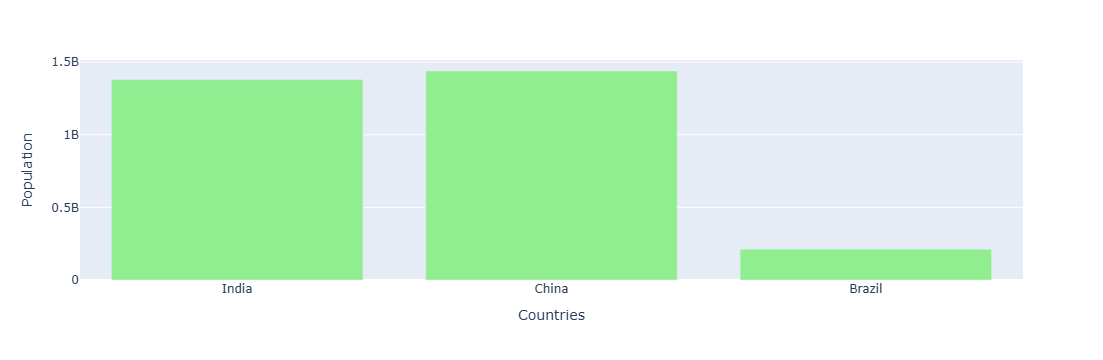

In [56]:
fig = px.bar(
    df_plot,
    x='country',      # the x-axis
    y=2020.0,         # the y-axis (population for 2020)
    color_discrete_sequence=['lightgreen']
)
fig.update_layout(
    xaxis_title='Countries',
    yaxis_title='Population'
)
fig.show()



## 2.1 Barplot grouped by "n" variables

In [57]:
# selecting a few years
df_pivot_sample=df_pivot[df_pivot.index.isin([1980,1990,2000,2010,2020])]

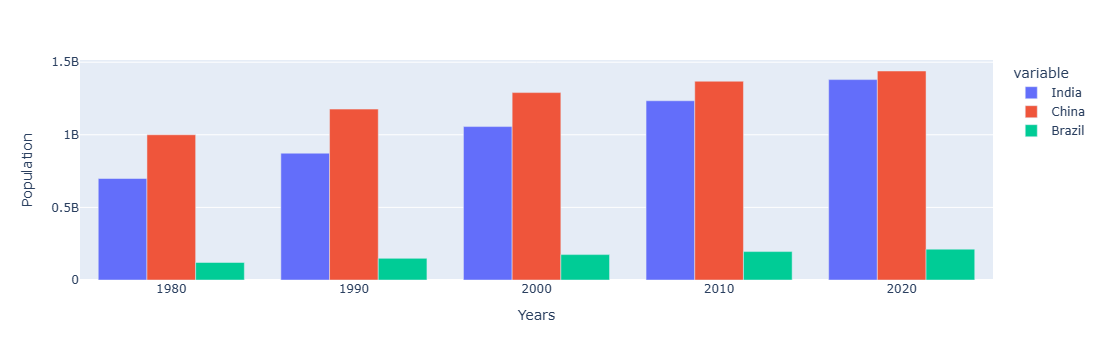

In [61]:
import plotly.express as px

# Reset index so 'year' becomes a column
df_sample_plot = df_pivot_sample.reset_index()

# Plot grouped bar chart with automatic colors for each country
fig = px.bar(
    df_sample_plot,
    x='year',           
    y=df_sample_plot.columns[1:],  # all countries
    barmode='group'               # bars side by side
)

fig.update_layout(
    xaxis_title='Years',
    yaxis_title='Population'
)

fig.show()



# Piechart

In [71]:
# changing column name
df_pivot_2020.rename(columns={2020:'2020'},inplace=True)

df_pivot_2020=df_pivot_2020.reset_index()

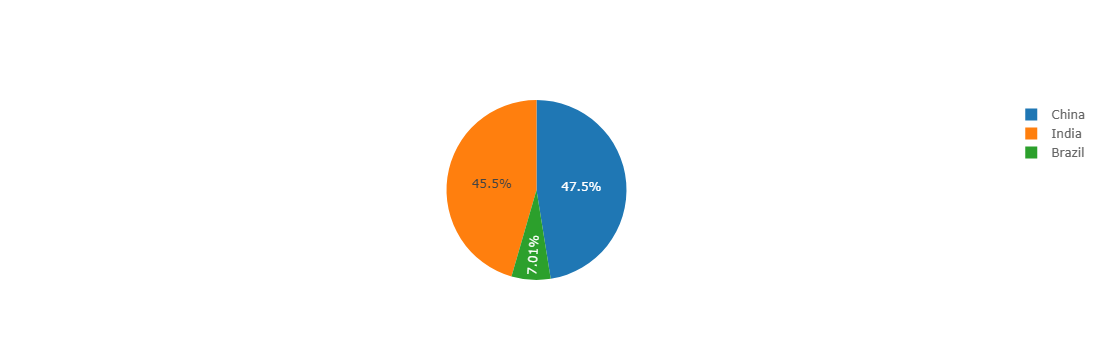

In [72]:
df_pivot_2020.iplot(kind='pie',values='2020',labels='country')

# 4 Boxplot

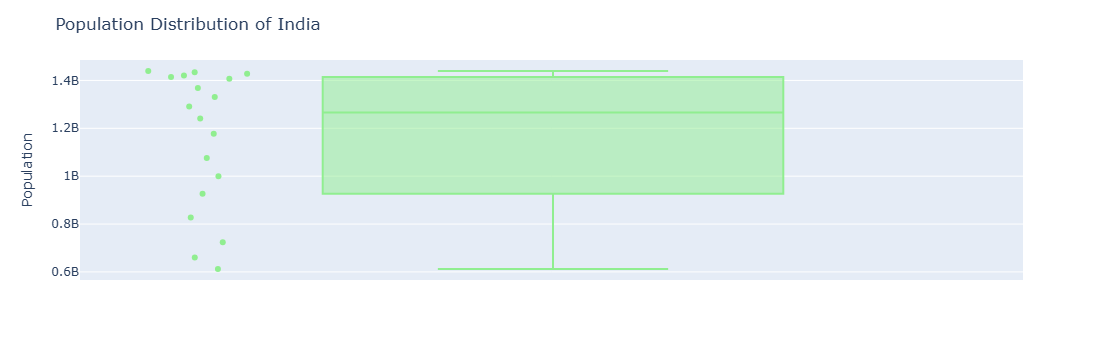

In [75]:
import plotly.express as px

# Reset index if needed (year becomes a column)
df_plot = df_pivot.reset_index()

# Box plot for India
fig = px.box(df_plot, y='China', points="all", color_discrete_sequence=['lightgreen'])

fig.update_layout(
    yaxis_title='Population',
    title='Population Distribution of India'
)

fig.show()


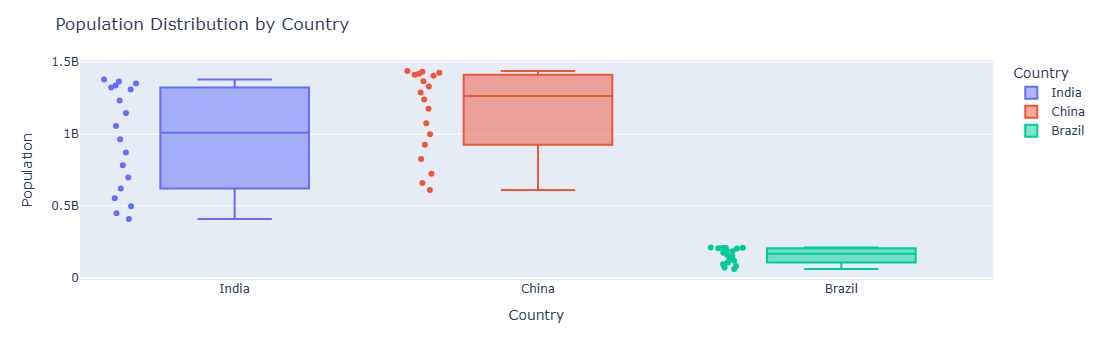

In [81]:
import plotly.express as px

# Reset index so 'year' becomes a column
df_plot = df_pivot.reset_index()

# Melt dataframe to long format (country, population)
df_melt = df_plot.melt(id_vars='year', var_name='Country', value_name='Population')

# Box plot for all countries
fig = px.box(df_melt, x='Country', y='Population', points="all", color='Country')

fig.update_layout(
    yaxis_title='Population',
    title='Population Distribution by Country'
)

fig.show()


# 5 Histogram

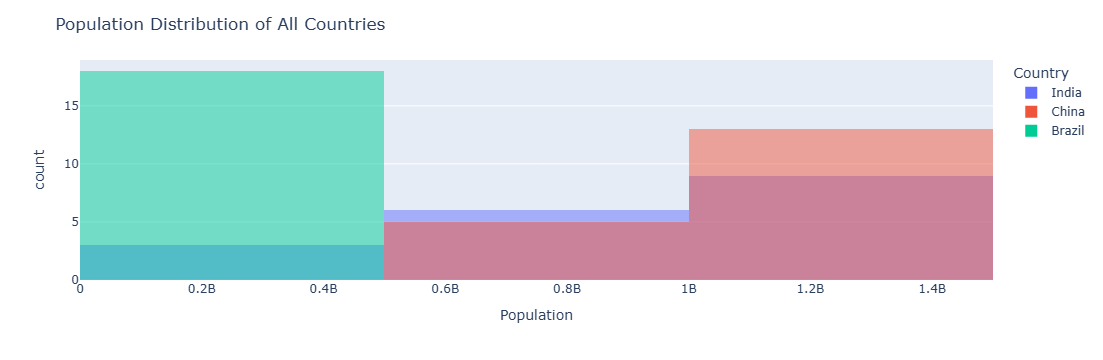

In [85]:
import plotly.express as px

df_plot = df_pivot.reset_index()
df_melt = df_plot.melt(id_vars='year', var_name='Country', value_name='Population')

fig = px.histogram(df_melt, x='Population', color='Country', barmode='overlay', nbins=3)
fig.update_layout(title='Population Distribution of All Countries')
fig.show()



# 6 Scatter Plot

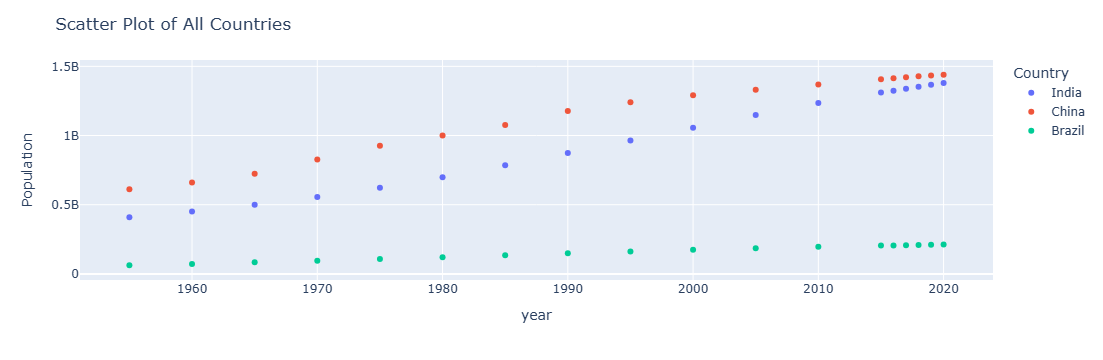

In [87]:
import plotly.express as px

df_plot = df_pivot.reset_index()
df_melt = df_plot.melt(id_vars='year', var_name='Country', value_name='Population')

fig = px.scatter(df_melt, x='year', y='Population', color='Country')
fig.update_layout(title='Scatter Plot of All Countries')
fig.show()
